Projekt MNwS - Aleksander Folfas 411052

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest


Zadanie 12


Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa-Smirnowa w przypadku, gdy
rozważane próbki danych pochodzą z rozkładów normalnych o tym samym odchyleniu
standardowym, ale różniących się wartościami oczekiwanymi. Rozważyć różne wartości odchyleń
standardowych. Uzyskane wyniki należy przedstawić na odpowiednich wykresach ilustrujących moce
testów z uwzględnieniem:
- liczby danych (można rozważać różne liczebności w każdej z próbek),
- wartości oczekiwanych.


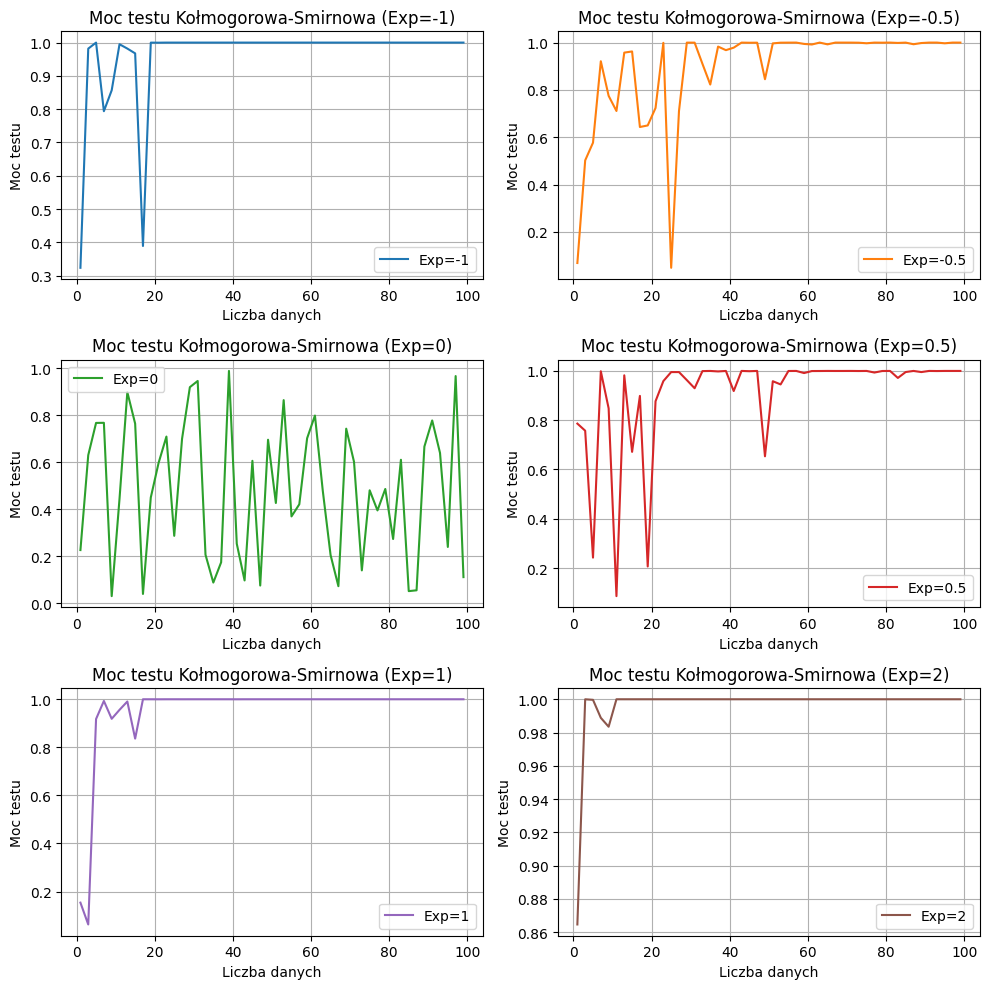

In [31]:
# Lista wartości odchylenia standardowego
exp_values = [-1,-0.5, 0, 0.5, 1, 2]

# Lista liczby danych (liczebności próbek)
n_values = np.arange(1, 101, 2)

# Ziarno losowości
np.random.seed(411052)

# Macierz do przechowywania wyników
powers = np.zeros((len(exp_values), len(n_values)))

# Przeprowadzenie symulacji
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, exp in enumerate(exp_values):
    for j, n in enumerate(n_values):
        # Wygenerowanie próbek danych z rozkładów normalnych
        data = np.random.normal(exp, 1, n)
        
        # Obliczenie mocy testu Kołmogorowa-Smirnowa
        _, p_value = kstest(data, 'norm')
        power = 1 - p_value
        
        # Zapisanie wyniku
        powers[i, j] = power
    
    # Wykres mocy testu w zależności od liczby danych i odchylenia standardowego
    ax = axes[i]
    ax.ymin = 0
    ax.ymax = 1
    ax.plot(n_values, powers[i], label=f"Exp={exp}", color=f"C{i}")
    ax.set_xlabel('Liczba danych')
    ax.set_ylabel('Moc testu')
    ax.set_title(f'Moc testu Kołmogorowa-Smirnowa (Exp={exp})')
    ax.legend()
    ax.grid(True)
    
plt.tight_layout()
plt.show()
